# 26. 인근 다리 개수 1개 이상 3개 이하

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/preprocessed/25_hangang_bridge.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_60241/3725147224.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/25_hangang_bridge.csv')


In [3]:
tmp = df.groupby('인근 한강다리 개수')['target'].mean()
tmp

인근 한강다리 개수
0.0    53175.102600
1.0    82980.572555
2.0    97777.835228
3.0    96809.100868
4.0    63261.537383
Name: target, dtype: float64

<Axes: xlabel='인근 한강다리 개수'>

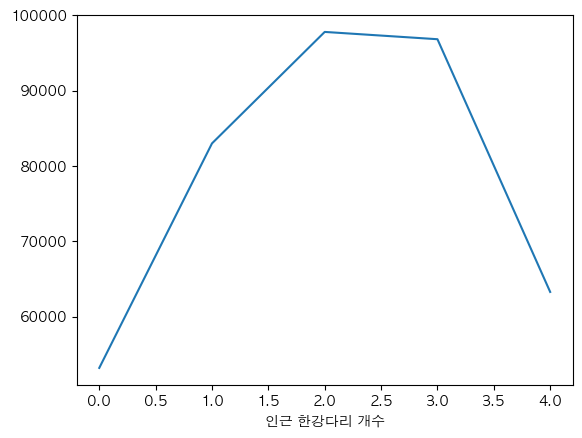

In [4]:
tmp.plot()

In [5]:
df['인근 다리 개수 1개이상 3개 이하'] = df['인근 한강다리 개수'].apply(lambda x: 1 if (1<=x) and (x<=3) else 0)
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,69.322000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,69.322000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,50.938744,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,50.938744,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,50.991003,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,51.082553,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0


In [13]:
test = df.groupby('인근 다리 개수 1개이상 3개 이하')['target'].mean()
test = pd.DataFrame(test)
test

,target
인근 다리 개수 1개이상 3개 이하,
0,53199.490393
1,90113.342731


<BarContainer object of 2 artists>

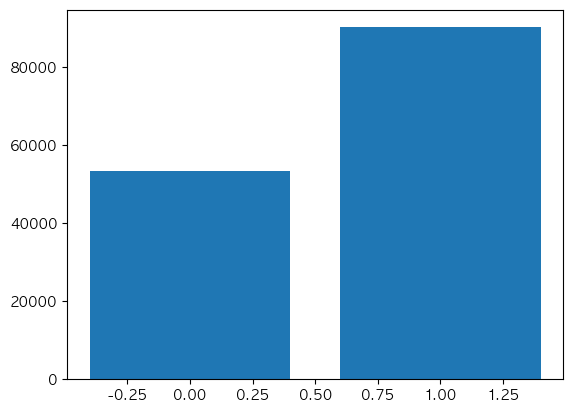

In [15]:
plt.bar([0, 1], test['target'])

In [16]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,매매 대비 전세가격 비율,아파트 카테고리,지하철 카테고리,구 카테고리,건설사 카테고리,가장 가까운 다리와의 거리,가장 가까운 다리 index,가장 가까운 다리,인근 한강다리 개수,인근 다리 개수 1개이상 3개 이하
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,70.059000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,69.322000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,69.322000,기타,분당선,강남구,기타,5581.622466,17.0,청담대교,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,50.938744,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,50.938744,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,50.991003,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,51.082553,기타,기타,기타,기타,5918.624352,23.0,구리암사대교,0.0,0


In [17]:
df.to_csv('../data/preprocessed/26_bridge_num_category.csv', index=False)